In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read in data into a dataframe 
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tutorial 01/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")

# Display top of dataframe
data.head(5)

Order  Property Id                                 Property Name  \
0      1        13286                                       201/205   
1      2        28400                    NYP Columbia (West Campus)   
2      3      4778226                                 MSCHoNY North   
3      4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4      5      4778288                               Neuro Institute   

  Parent Property Id        Parent Property Name BBL - 10 digits  \
0              13286                     201/205      1013160001   
1              28400  NYP Columbia (West Campus)      1021380040   
2              28400  NYP Columbia (West Campus)      1021380030   
3              28400  NYP Columbia (West Campus)      1021390001   
4              28400  NYP Columbia (West Campus)      1021390085   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   
2                                   1-02138-0030   
3                                   1-02139-0001   
4                                   1-02139-0085   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2                                            1063380   
3                                   1087281; 1076746   
4                                            1063403   

  Address 1 (self-reported)                Address 2 Postal Code  \
0  201/205  East  42nd  st.            Not Available       10017   
1          622 168th Street            Not Available       10032   
2             3975 Broadway            Not Available       10032   
3   161 Fort Washington Ave  177 Fort Washington Ave       10032   
4     710 West 168th Street            Not Available       10032   

  Street Number           Street Name    Borough  DOF Gross Floor Area  \
0           675              3 AVENUE  Manhattan              289356.0   
1           180  FT WASHINGTON AVENUE  Manhattan             3693539.0   
2          3975              BROADWAY  Manhattan              152765.0   
3           161  FT WASHINGTON AVENUE  Manhattan              891040.0   
4           193  FT WASHINGTON AVENUE  Manhattan              211400.0   

   Primary Property Type - Self Selected  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

  List of All Property Use Types at Property  \
0                                     Office   
1      Hospital (General Medical & Surgical)   
2      Hospital (General Medical & Surgical)   
3      Hospital (General Medical & Surgical)   
4      Hospital (General Medical & Surgical)   

               Largest Property Use Type  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

  Largest Property Use Type - Gross Floor Area (ft²)  \
0                                             293447   
1                                            3889181   
2                                             231342   
3                                            1305748   
4                                             179694   

  2nd Largest Property Use Type  \
0                 Not Available   
1                 Not Available   
2                 Not Available   
3                 Not Available   
4                 Not Available   

  2nd Largest Property Use - Gross Floor Area (ft²)  \
0                                     Not Available   
1                                     Not Available   
2                                     Not Available   
3                                     Not Available   
4                    

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [5]:
data = data.replace({'Not Available': np.nan})

# Iterate through the columns
for col in list(data.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [6]:
# Statistics for each column
data.describe()

Order   Property Id  DOF Gross Floor Area  \
count  11746.000000  1.174600e+04          1.162800e+04   
mean    7185.759578  3.642958e+06          1.732695e+05   
std     4323.859984  1.049070e+06          3.367055e+05   
min        1.000000  7.365000e+03          5.002800e+04   
25%     3428.250000  2.747222e+06          6.524000e+04   
50%     6986.500000  3.236404e+06          9.313850e+04   
75%    11054.500000  4.409092e+06          1.596140e+05   
max    14993.000000  5.991312e+06          1.354011e+07   

       Largest Property Use Type - Gross Floor Area (ft²)  \
count                                       1.174400e+04    
mean                                        1.605524e+05    
std                                         3.095746e+05    
min                                         5.400000e+01    
25%                                         6.520100e+04    
50%                                         9.132400e+04    
75%                                         1.532550e+05    
max                                         1.421712e+07    

       2nd Largest Property Use - Gross Floor Area (ft²)  \
count                                        3741.000000   
mean                                        22778.682010   
std                                         55094.441422   
min                                             0.000000   
25%                                          4000.000000   
50%                                          8654.000000   
75%                                         20000.000000   
max                                        962428.000000   

       3rd Largest Property Use Type - Gross Floor Area (ft²)    Year Built  \
count                                        1484.000000       11746.000000   
mean                                        12016.825270        1948.738379   
std                                         27959.755486          30.576386   
min                                             0.000000        1600.000000   
25%                                          1720.750000        1927.000000   
50%                                          5000.000000        1941.000000   
75%                                         12000.000000        1966.000000   
max                                        591640.000000        2019.000000   

       Number of Buildings - Self-reported     Occupancy  ENERGY STAR Score  \
count                         11746.000000  11746.000000        9642.000000   
mean                              1.289971     98.762557          59.854594   
std                               4.017484      7.501603          29.993586   
min                               0.000000      0.000000           1.000000   
25%                               1.000000    100.000000          37.000000   
50%                               1.000000    100.000000          65.000000   
75%                               1.000000    100.000000          85.000000   
max                             161.000000    100.000000         100.000000   

       Site EUI (kBtu/ft²)  Weather Normalized Site EUI (kBtu/ft²)  \
count         11583.000000                            10281.000000   
mean            280.071484                              309.747466   
std            8607.178877                             9784.731207   
min               0.000000                                0.000000   
25%              61.800000                               65.100000   
50%              78.500000                               82.500000   
75%              97.600000                              102.500000   
max          869265.000000                           939329.000000   

       Weather Normalized Site Electricity Intensity (kWh/ft²)  \
count                                       10959.000000         
mean                                           11.072643         
std                                           127.733868         
min                                             0.000000         
25%   

In [7]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


Missing Values  \
Fuel Oil #1 Use (kBtu)                                       11737   
Diesel #2 Use (kBtu)                                         11730   
Address 2                                                    11539   
Fuel Oil #5 & 6 Use (kBtu)                                   11152   
District Steam Use (kBtu)                                    10810   
Fuel Oil #4 Use (kBtu)                                       10425   
3rd Largest Property Use Type - Gross Floor Are...           10262   
3rd Largest Property Use Type                                10262   
Fuel Oil #2 Use (kBtu)                                        9165   
2nd Largest Property Use Type                                 8005   
2nd Largest Property Use - Gross Floor Area (ft²)             8005   
Metered Areas  (Water)                                        4609   
Water Intensity (All Water Sources) (gal/ft²)                 3984   
Water Use (All Water Sources) (kgal)                          3984   
Latitude                                                      2263   
Longitude                                                     2263   
Community Board                                               2263   
Council District                                              2263   
Census Tract                                                  2263   
NTA                                                           2263   
ENERGY STAR Score                                             2104   
Weather Normalized Site Natural Gas Intensity (...            1963   
Weather Normalized Site Natural Gas Use (therms)              1962   
Weather Normalized Source EUI (kBtu/ft²)                      1465   
Weather Normalized Site EUI (kBtu/ft²)                        1465   
Natural Gas Use (kBtu)                                        1442   
Weather Normalized Site Electricity Intensity (...             787   
Weather Normalized Site Electricity (kWh)                      786   
Electricity Use - Grid Purchase (kBtu)                         244   
Site EUI (kBtu/ft²)                                            163   
Source EUI (kBtu/ft²)                                          163   
NYC Building Identification Number (BIN)                       162   
Street Number                                                  124   
Street Name                                                    122   
Borough                                                        118   
DOF Gross Floor Area                                           118   
Water Required?                                                118   
Direct GHG Emissions (Metric Tons CO2e)                         83   
Total GHG Emissions (Metric Tons CO2e)                          74   
Indirect GHG Emissions (Metric Tons CO2e)                       65   
Metered Areas (Energy)                                          57   
DOF Benchmarking Submission Status                              30   
NYC Borough, Block and Lot (BBL) self-reported                  11   
BBL - 10 digits                                                 11   
Largest Property Use Type                                        2   
Largest Property Use Type - Gross Floor Area (ft²)               2   

                                                    % of Total Values  
Fuel Oil #1 Use (kBtu)                                           99.9  
Diesel #2 Use (kBtu)                                             99.9  
Address 2                                                        98.2  
Fuel Oil #5 & 6 Use (kBtu)                                       94.9  
District Steam Use (kBtu)                                        92.0  
Fuel Oil #4 Use (kBtu)                                           88.8  
3rd Largest Property Use Type - Gross Floor Are...               87.4  
3rd Largest Property Use Type                                    87.4  
Fuel Oil #2 Use (kBtu)                                           78.0  
2nd Largest Property Use Type            

In [9]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
We will remove 11 columns.


In [10]:
data = data.drop(columns = list(missing_columns))

In [11]:
missing_values_table(data)

Your selected dataframe has 49 columns.
There are 35 columns that have missing values.


Missing Values  \
Metered Areas  (Water)                                        4609   
Water Intensity (All Water Sources) (gal/ft²)                 3984   
Water Use (All Water Sources) (kgal)                          3984   
NTA                                                           2263   
Census Tract                                                  2263   
Council District                                              2263   
Community Board                                               2263   
Longitude                                                     2263   
Latitude                                                      2263   
ENERGY STAR Score                                             2104   
Weather Normalized Site Natural Gas Intensity (...            1963   
Weather Normalized Site Natural Gas Use (therms)              1962   
Weather Normalized Source EUI (kBtu/ft²)                      1465   
Weather Normalized Site EUI (kBtu/ft²)                        1465   
Natural Gas Use (kBtu)                                        1442   
Weather Normalized Site Electricity Intensity (...             787   
Weather Normalized Site Electricity (kWh)                      786   
Electricity Use - Grid Purchase (kBtu)                         244   
Site EUI (kBtu/ft²)                                            163   
Source EUI (kBtu/ft²)                                          163   
NYC Building Identification Number (BIN)                       162   
Street Number                                                  124   
Street Name                                                    122   
Water Required?                                                118   
DOF Gross Floor Area                                           118   
Borough                                                        118   
Direct GHG Emissions (Metric Tons CO2e)                         83   
Total GHG Emissions (Metric Tons CO2e)                          74   
Indirect GHG Emissions (Metric Tons CO2e)                       65   
Metered Areas (Energy)                                          57   
DOF Benchmarking Submission Status                              30   
BBL - 10 digits                                                 11   
NYC Borough, Block and Lot (BBL) self-reported                  11   
Largest Property Use Type - Gross Floor Area (ft²)               2   
Largest Property Use Type                                        2   

                                                    % of Total Values  
Metered Areas  (Water)                                           39.2  
Water Intensity (All Water Sources) (gal/ft²)                    33.9  
Water Use (All Water Sources) (kgal)                             33.9  
NTA                                                              19.3  
Census Tract                                                     19.3  
Council District                                                 19.3  
Community Board                                                  19.3  
Longitude                                                        19.3  
Latitude                                                         19.3  
ENERGY STAR Score                                                17.9  
Weather Normalized Site Natural Gas Intensity (...               16.7  
Weather Normalized Site Natural Gas Use (therms)                 16.7  
Weather Normalized Source EUI (kBtu/ft²)                         12.5  
Weather Normalized Site EUI (kBtu/ft²)                           12.5  
Natural Gas Use (kBtu)                                           12.3  
Weather Normalized Site Electricity Intensity (...                6.7  
Weather Normalized Site Electricity (kWh)                         6.7  
Electricity Use - Grid Purchase (kBtu)                            2.1  
Site EUI (kBtu/ft²)                                               1.4  
Source EUI (kBtu/ft²)                                             1.4  
NYC Building Identi

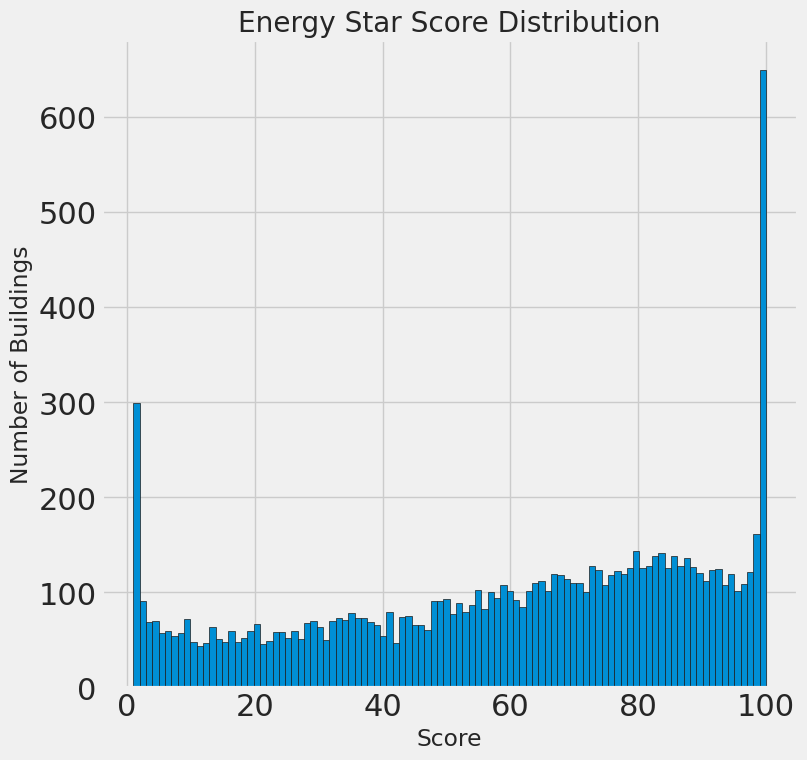

In [12]:
figsize(8, 8)

# Rename the score 
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

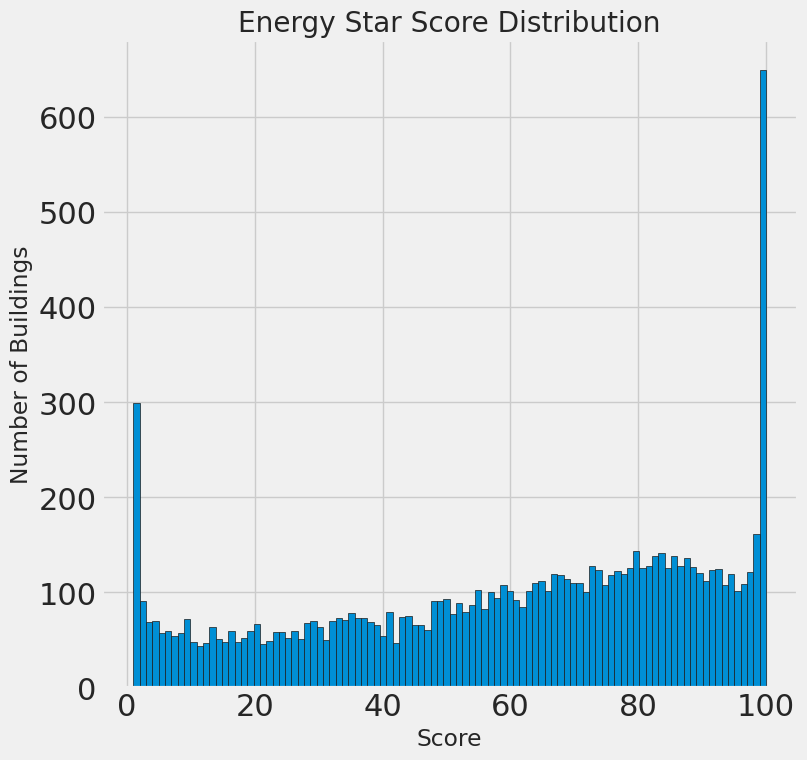

In [13]:
figsize(8, 8)

# Rename the score 
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

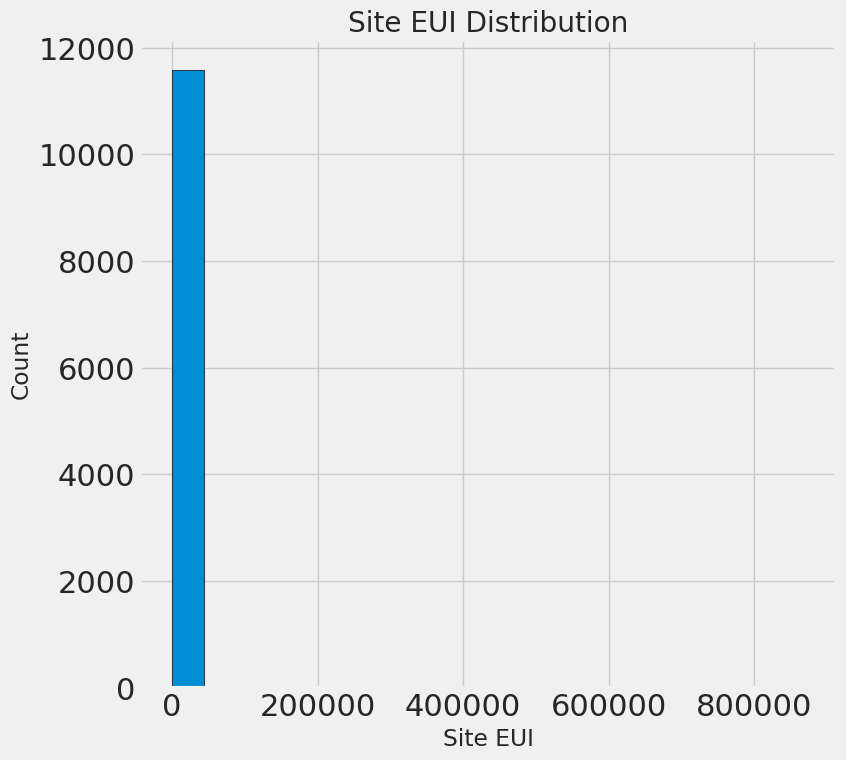

In [14]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [15]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [16]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [17]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :]

Order  Property Id Property Name                   Parent Property Id  \
8068   9984      4414323  234 Skillman  Not Applicable: Standalone Property   

                     Parent Property Name BBL - 10 digits  \
8068  Not Applicable: Standalone Property      3028937502   

     NYC Borough, Block and Lot (BBL) self-reported  \
8068                                     3028937502   

     NYC Building Identification Number (BIN) Address 1 (self-reported)  \
8068                        3390250 , 3338313       234 Skillman avenue   

     Postal Code Street Number      Street Name   Borough  \
8068       11211           234  SKILLMAN AVENUE  Brooklyn   

      DOF Gross Floor Area Primary Property Type - Self Selected  \
8068               61811.0                   Multifamily Housing   

     List of All Property Use Types at Property Largest Property Use Type  \
8068                        Multifamily Housing       Multifamily Housing   

      Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
8068                                            56900.0         2004   

      Number of Buildings - Self-reported  Occupancy Metered Areas (Energy)  \
8068                                    1         90         Whole Building   

     Metered Areas  (Water)  score  Site EUI (kBtu/ft²)  \
8068                    NaN    1.0             869265.0   

      Weather Normalized Site EUI (kBtu/ft²)  \
8068                                939329.0   

      Weather Normalized Site Electricity Intensity (kWh/ft²)  \
8068                                                9.9         

      Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
8068                                             9393.0            

      Weather Normalized Source EUI (kBtu/ft²)  Natural Gas Use (kBtu)  \
8068                                  986366.0            4.945919e+10   

      Weather Normalized Site Natural Gas Use (therms)  \
8068                                       534458968.8   

      Electricity Use - Grid Purchase (kBtu)  \
8068                               1983655.6   

      Weather Normalized Site Electricity (kWh)  \
8068                                   563239.6   

      Total GHG Emissions (Metric Tons CO2e)  \
8068                               2627199.1   

      Direct GHG Emissions (Metric Tons CO2e)  \
8068                                2627015.0   

      Indirect GHG Emissions (Metric Tons CO2e)  \
8068                                      184.1   

      Property GFA - Self-Reported (ft²)  \
8068                             56900.0   

      Water Use (All Water Sources) (kgal)  \
8068                                2547.9   

      Water Intensity (All Water Sources) (gal/ft²)  Source EUI (kBtu/ft²)  \
8068                                          44.78               912801.1   

                Release Date Water Required?  \
8068  05/01/2017 11:34:14 PM             NaN   

     DOF Benchmarking Submission Status   Latitude  Longitude  \
8068                      In Compliance  40.716233  -73.94141   

      Community Board  Council District  Census Tract  \
8068              1.0              34.0         477.0   

                                                    NTA  
8068  East Williamsburg                             ...

In [18]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

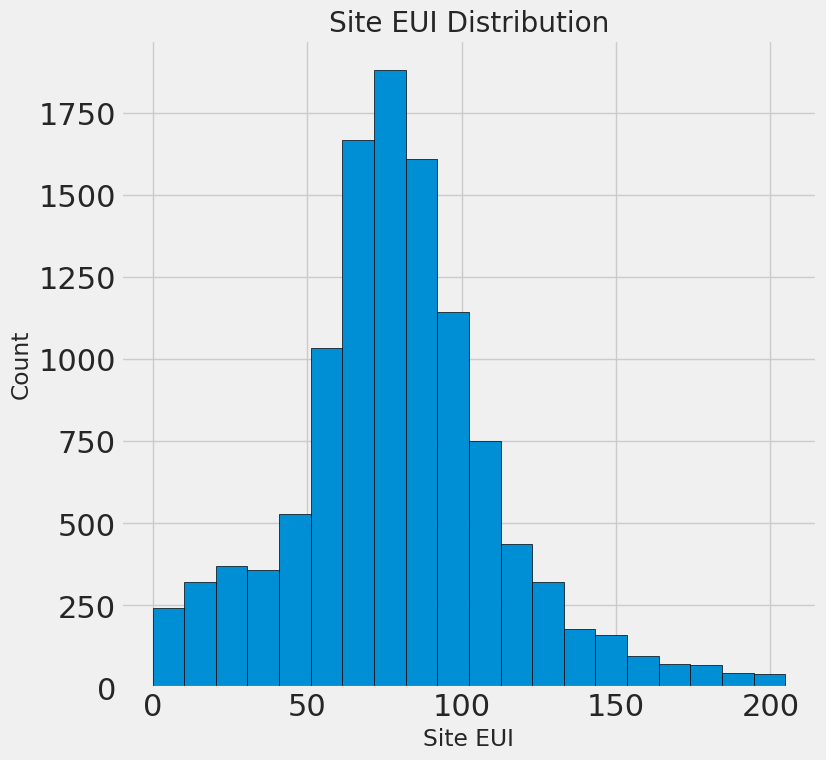

In [19]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [20]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

<ipython-input-21-3f15ebaccac4>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),
<ipython-input-21-3f15ebaccac4>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),
<ipython-input-21-3f15ebaccac4>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),
<ipython-input-21-3f15ebaccac4>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['score'].dropna(),


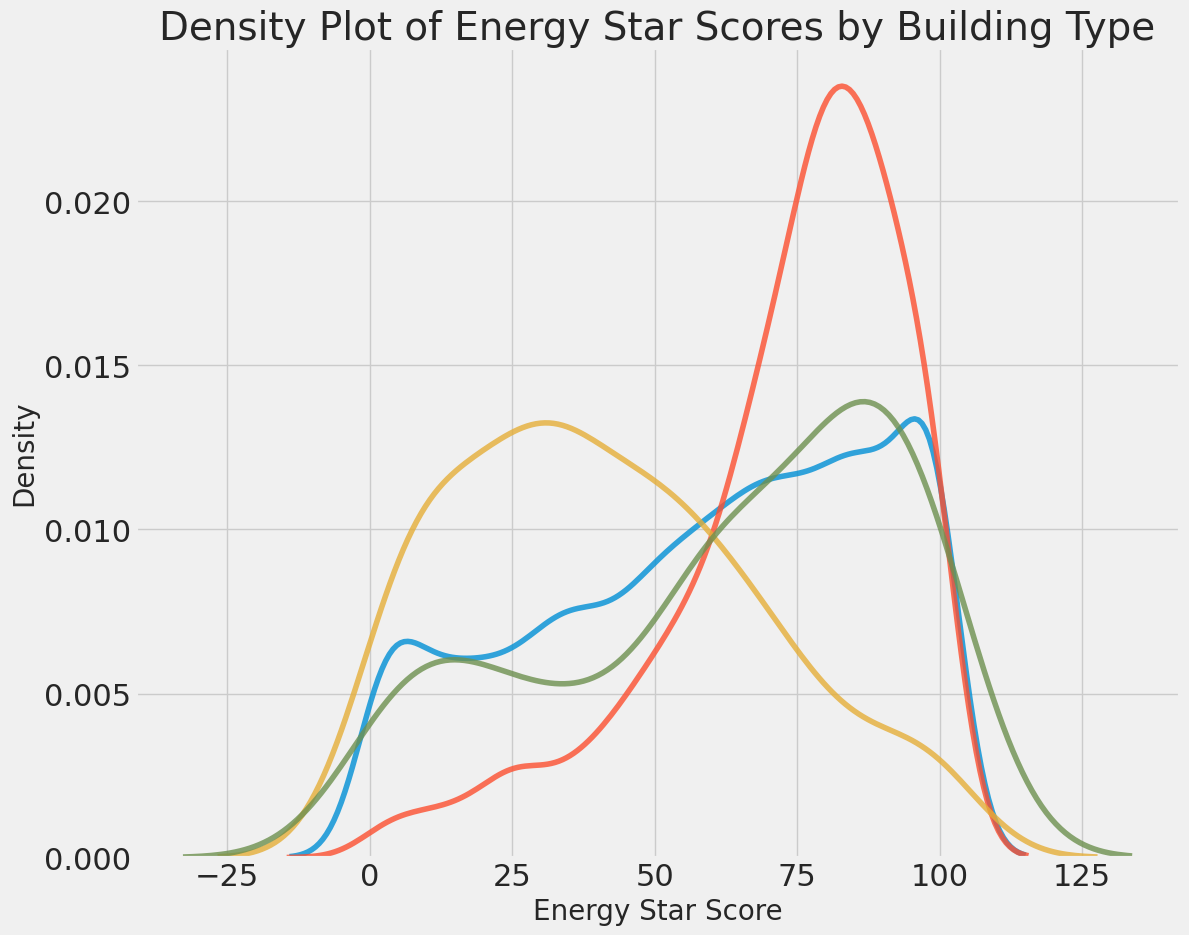

In [21]:
# Plot of distribution of scores for building categories
figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

In [22]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

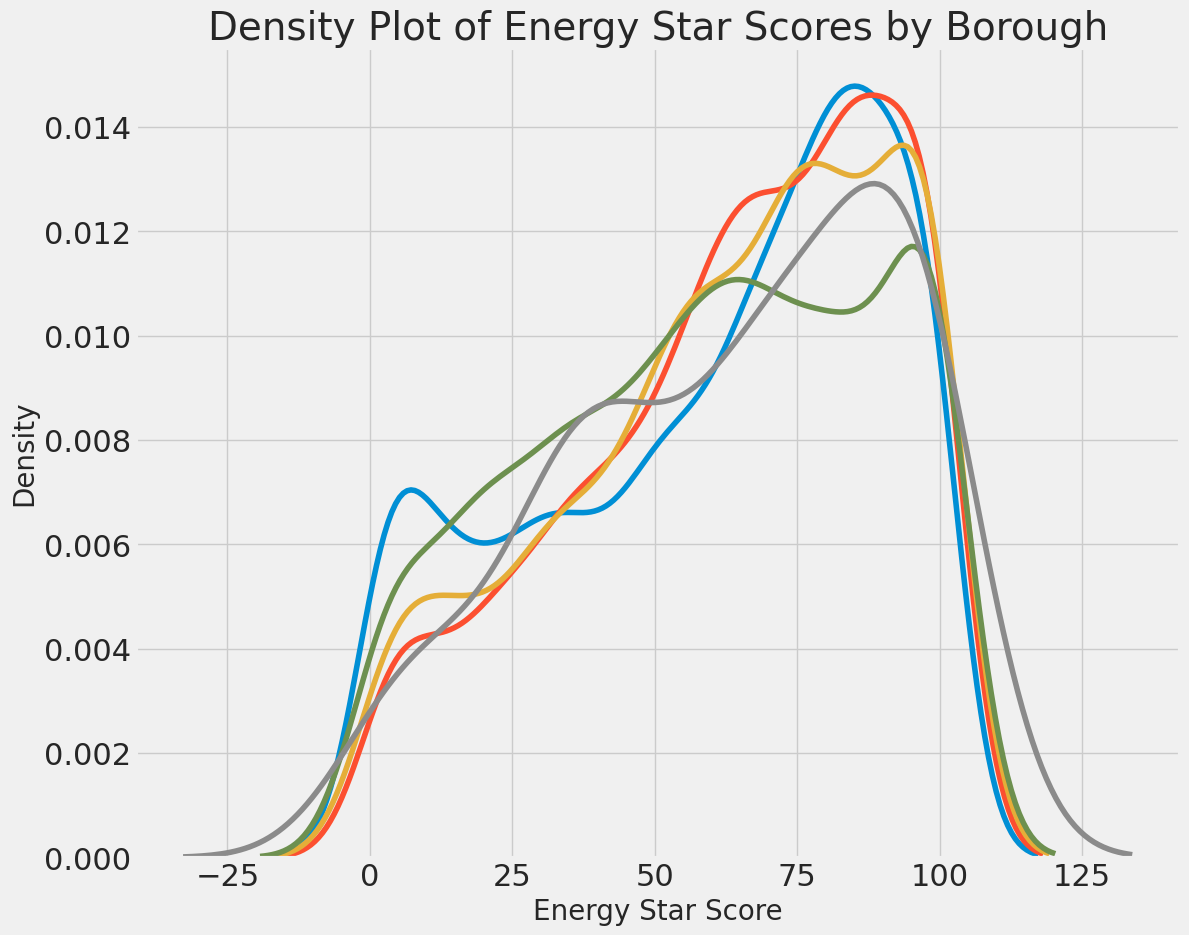

In [23]:
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);

In [24]:
# Find all correlations and sort 
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

In [25]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(uf

In [26]:
# Display most negative correlations
correlations.head(15)

Site EUI (kBtu/ft²)                                            -0.723864
Weather Normalized Site EUI (kBtu/ft²)                         -0.713993
sqrt_Site EUI (kBtu/ft²)                                       -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                       -0.645542
Source EUI (kBtu/ft²)                                          -0.641037
log_Source EUI (kBtu/ft²)                                      -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.620329
log_Site EUI (kBtu/ft²)                                        -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.424246
sqrt_Weather Normalized Site Electricity Intensity 

In [27]:
# Display most positive correlations
correlations.tail(15)

sqrt_Order                                                         0.028662
Borough_Queens                                                     0.029545
Largest Property Use Type_Supermarket/Grocery Store                0.030038
Largest Property Use Type_Residence Hall/Dormitory                 0.035407
Order                                                              0.036827
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
log_Community Board                                                0.055495
Community Board                                                    0.056612
sqrt_Community Board                                               0.058029
sqrt_Council District                                              0.060623
log_Council District                                               0.061101
Council District                                                   0.061639
Largest Prop

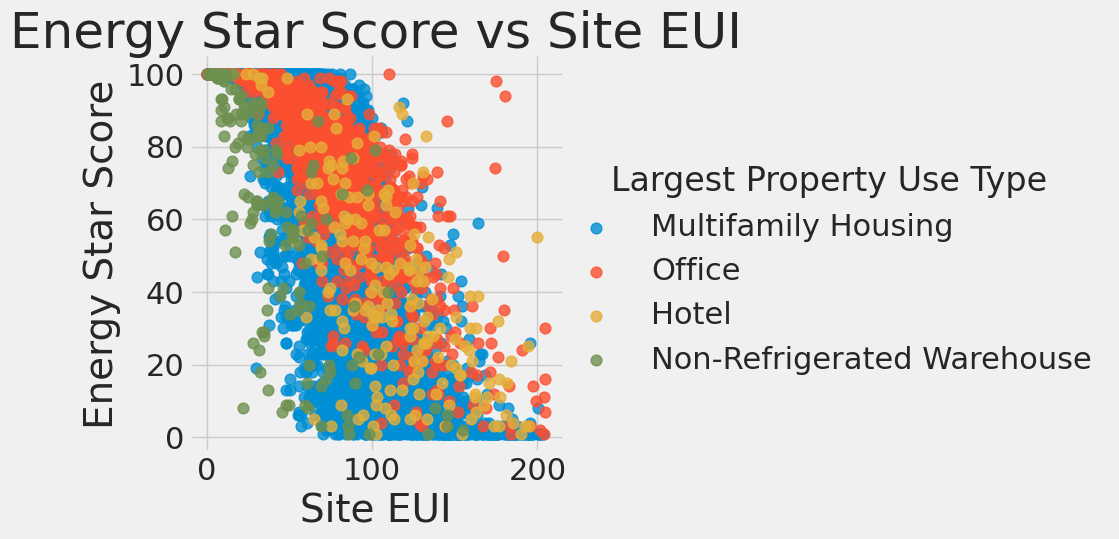

In [30]:
figsize(12, 10)

# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot(x='Site EUI (kBtu/ft²)', y='score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

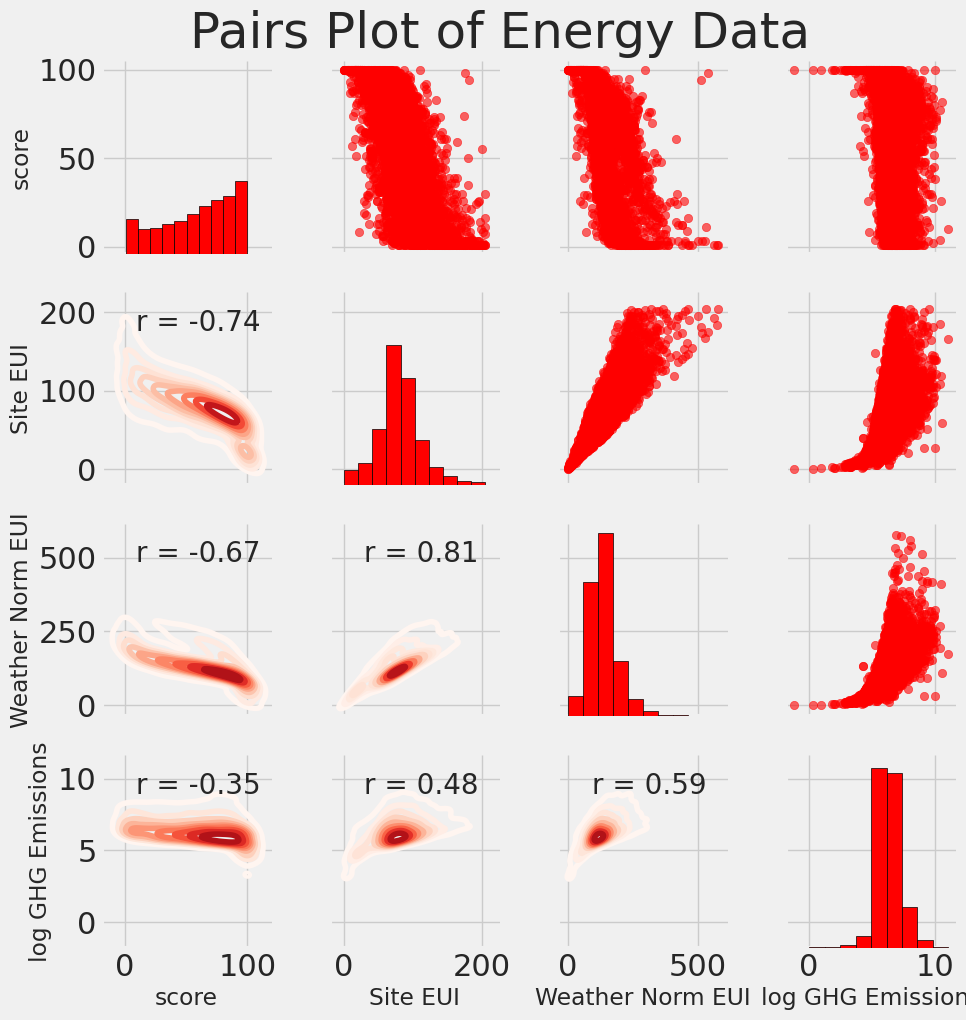

In [31]:
# Extract the columns to  plot
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

In [32]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(uf

(11319, 110)

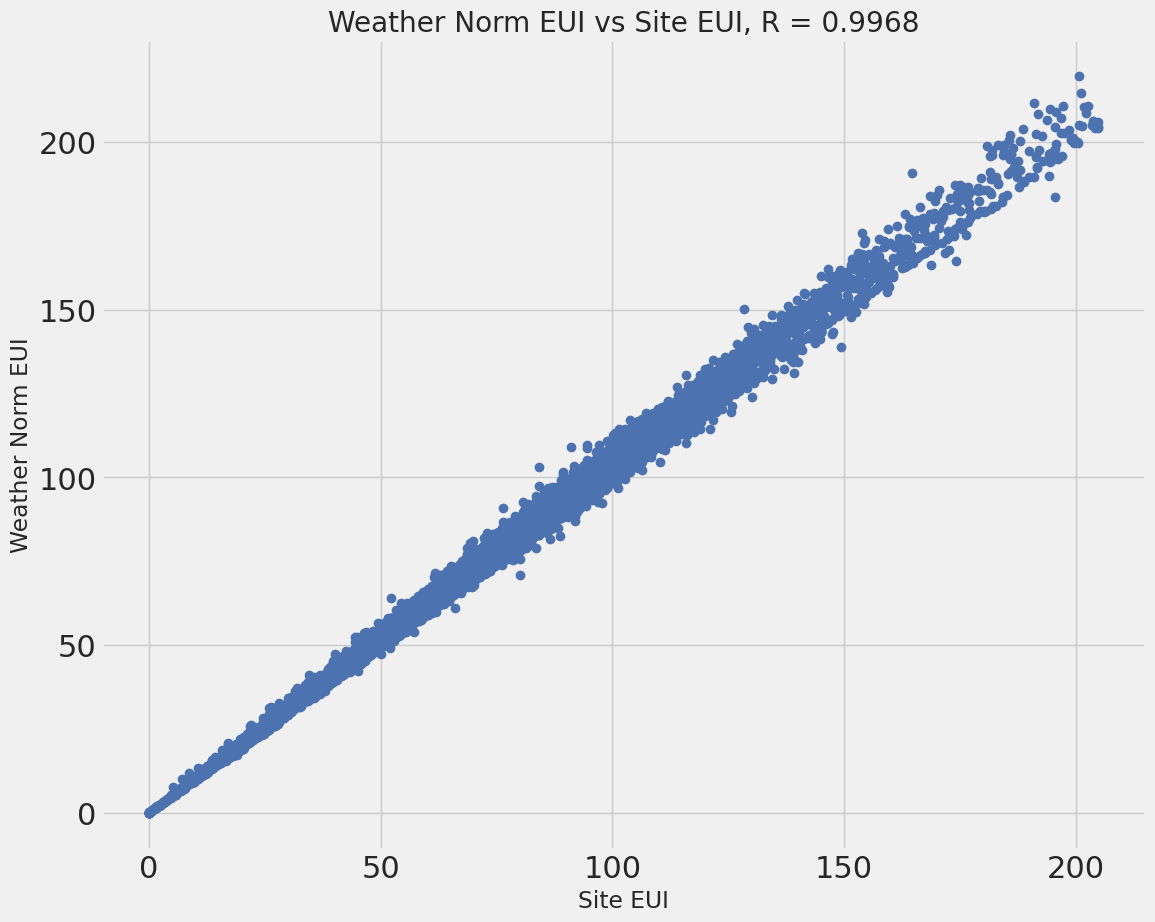

In [33]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);


In [34]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [35]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);

In [36]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 65)

In [37]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 65)
(9461, 65)


In [38]:
# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6622, 64)
(2839, 64)
(6622, 1)
(2839, 1)


In [39]:
# Save the no scores, training, and testing data
no_score.to_csv('/content/drive/MyDrive/Colab Notebooks/Tutorial 01/no_score.csv', index = False)
X.to_csv('/content/drive/MyDrive/Colab Notebooks/Tutorial 01/training_features.csv', index = False)
X_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Tutorial 01/testing_features.csv', index = False)
y.to_csv('/content/drive/MyDrive/Colab Notebooks/Tutorial 01/training_labels.csv', index = False)
y_test.to_csv('/content/drive/MyDrive/Colab Notebooks/Tutorial 01/testing_labels.csv', index = False)

In [40]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [41]:
# Read in data into dataframes 
train_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tutorial 01/training_features.csv')
test_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tutorial 01/testing_features.csv')
train_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tutorial 01/training_labels.csv')
test_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tutorial 01/testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6622, 64)
Testing Feature Size:   (2839, 64)
Training Labels Size:   (6622, 1)
Testing Labels Size:    (2839, 1)


In [42]:
train_features.head(12)

Order  Property Id  DOF Gross Floor Area  Year Built  \
0   13276      5849784               90300.0        1950   
1    7377      4398442               52000.0        1926   
2    9479      4665374              104700.0        1954   
3   14774      3393340              129333.0        1992   
4    3286      2704325              109896.0        1927   
5    1060      2430725              182655.0        1929   
6   10846      5737475               65400.0        1942   
7    4280      2670505              113150.0        1938   
8   12974      2964670              137700.0        1959   
9   13244      4414693               63693.0        1941   
10   3903      2669664               82644.0        1922   
11   8336      2809354               51317.0        1925   

    Number of Buildings - Self-reported  Occupancy  Site EUI (kBtu/ft²)  \
0                                     1        100                126.0   
1                                     1        100                 95.4   
2                                     1        100                 40.4   
3                                     1        100                157.1   
4                                     1        100                 62.3   
5                                     1         90                 52.9   
6                                     1        100                 66.8   
7                                     1        100                 78.4   
8                                     1        100                 63.0   
9                                     1        100                 97.8   
10                                    1        100                 55.4   
11                                    1        100                118.7   

    Weather Normalized Site Electricity Intensity (kWh/ft²)  \
0                                                 5.2         
1                                                 4.7         
2                                                 3.8         
3                                                16.9         
4                                                 3.5         
5                                                 9.7         
6                                                 3.0         
7                                                 5.7         
8                                                 3.4         
9                                                 4.3         
10                                                4.5         
11                                                3.6         

    Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
0                                                 1.2            
1                                                 0.9            
2                                                 0.3            
3                                                 1.1            
4                                                 0.0            
5                                                 0.2            
6                                                 0.6            
7                                                 NaN            
8                                                 0.5            
9                                                 0.8            
10                                                0.0            
11                                                1.1            

    Water Intensity (All Water Sources) (gal/ft²)   Latitude  Longitude  \
0                                           99.41        NaN        NaN   
1                                             NaN  40.835496 -73.887745   
2                                             NaN  40.663206 -73.949469   
3                                             NaN  40.622968 -74.078742   
4                                           28.65  40.782421 -73.972622   
5                                            4.80  40.725136 -74.004438   
6                                          

In [43]:
train_labels.head()

score
0   16.0
1   53.0
2   99.0
3   35.0
4   91.0

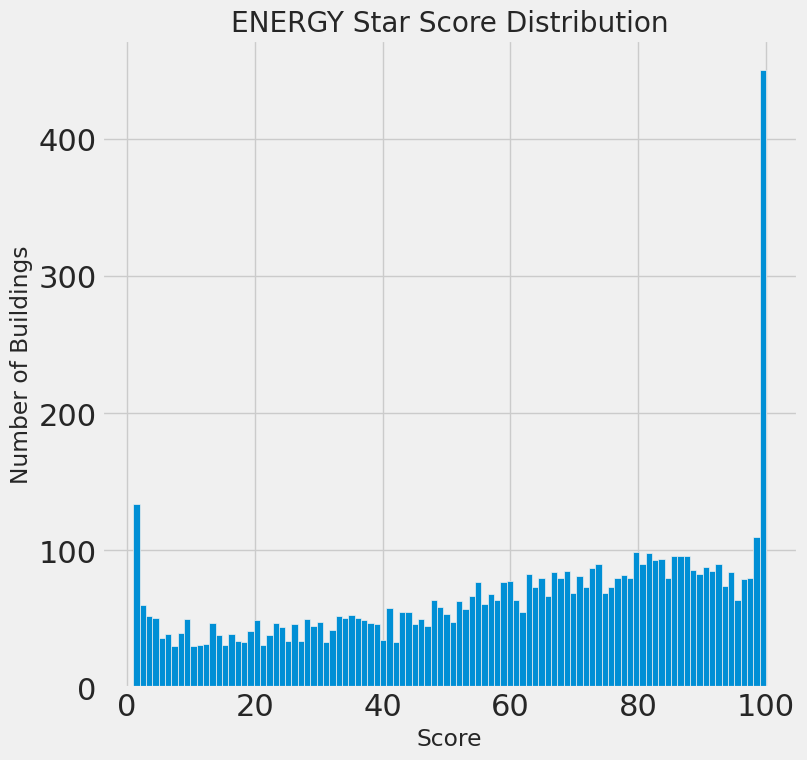

In [44]:
figsize(8, 8)

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(train_labels['score'].dropna(), bins = 100);
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('ENERGY Star Score Distribution');

In [45]:
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

In [46]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [47]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


In [48]:
from sklearn.preprocessing import MinMaxScaler
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [49]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

In [50]:
print(y)

[16. 53. 99. ... 41. 97. 67.]


In [51]:
print(y_test)

[13. 55. 87. ... 83. 51. 96.]


In [52]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [53]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 13.4651


In [54]:
random_forest = RandomForestRegressor(random_state=60)
#random_forest_mae = 10.02
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 9.5231


In [55]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 10.9337


In [56]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 10.0116


In [57]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 13.0131


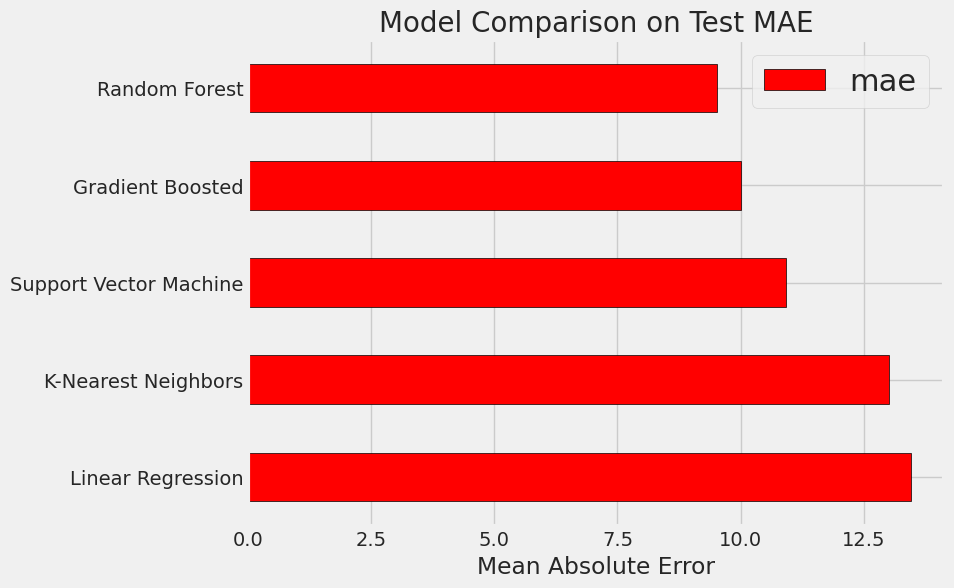

In [58]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

In [59]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [66]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [67]:
# Fit on the training data
random_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
56 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.9/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/utils/_param_

RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

In [68]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
3       23.348771      0.287368         0.029763        0.014860   
9       15.910723      0.521200         0.019259        0.007201   
10     110.254471      0.913854         0.089506        0.030632   
2       65.632964      1.805580         0.045011        0.009348   
21       7.495810      0.633539         0.019339        0.000455   
1        4.690348      0.616280         0.008650        0.000418   
8       96.616846      1.178326         0.127527        0.000399   
20      38.161987      1.022652         0.049063        0.003304   
18     126.320161      1.251949         0.095903        0.031815   
6      208.109414      5.604467         0.221016        0.030787   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
3                 500                       6                      8   
9                 500                       4                      2   
10               1100                      10                      6   
2                 500                       4                      2   
21                500                       6                      4   
1                 100                       6                      8   
8                1500                       6                      2   
20                500                       6                      1   
18                500                       6                      1   
6                1500                       6                      2   

   param_max_features param_max_depth param_loss  \
3                None               5      huber   
9                auto               3      huber   
10               None              10      huber   
2                auto              10      huber   
21               log2               5      huber   
1                sqrt              10      huber   
8                sqrt              10      huber   
20               sqrt              10      huber   
18               auto              15      huber   
6                sqrt              15      huber   

                                               params  split0_test_score  \
3   {'n_estimators': 500, 'min_samples_split': 6, ...          -8.872066   
9   {'n_estimators': 500, 'min_samples_split': 4, ...          -9.062882   
10  {'n_estimators': 1100, 'min_samples_split': 10...          -9.193406   
2   {'n_estimators': 500, 'min_samples_split': 4, ...          -9.333559   
21  {'n_estimators': 500, 'min_samples_split': 6, ...          -9.365194   
1   {'n_estimators': 100, 'min_samples_split': 6, ...          -9.654491   
8   {'n_estimators': 1500, 'min_samples_split': 6,...          -9.630076   
20  {'n_estimators': 500, 'min_samples_split': 6, ...          -9.638482   
18  {'n_estimators': 500, 'min_samples_split': 6, ...         -10.075558   
6   {'n_estimators': 1500, 'min_samples_split': 6,...         -10.192961   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
3           -8.904065          -9.317120          -9.075047        -9.042074   
9           -9.043722          -9.442664          -9.197954        -9.186805   
10          -9.254552          -9.565642          -9.464933        -9.369633   
2           -9.249347          -9.599790          -9.328477        -9.377793   
21          -9.286988          -9.751767          -9.409179        -9.453282   
1           -9.563284          -9.760660          -9.586534        -9.641242   
8           -9.751876          -9.864687          -9.858023        -9.776165   
20          -9.814223          -9.977284          -9.679523        -9.777378   
18          -9.962943          -9.872734         -10.014923        -9.981539   
6          -10.142236         -10.379401         -10.496965       -10.302891   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
3         0.176555                1           -4.384343           -4.326121   
9         0.1

In [69]:
random_cv.best_estimator_

GradientBoostingRegressor(loss='huber', max_depth=5, min_samples_leaf=8,
                          min_samples_split=6, n_estimators=500,
                          random_state=42)

In [85]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss='absolute_error', max_depth=5, min_samples_leaf=6, 
                                  min_samples_split=6, max_features=None, random_state=42)


# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [86]:
# Fit the grid search
grid_search.fit(X, y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


GridSearchCV(cv=4,
             estimator=GradientBoostingRegressor(loss='absolute_error',
                                                 max_depth=5,
                                                 min_samples_leaf=6,
                                                 min_samples_split=6,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

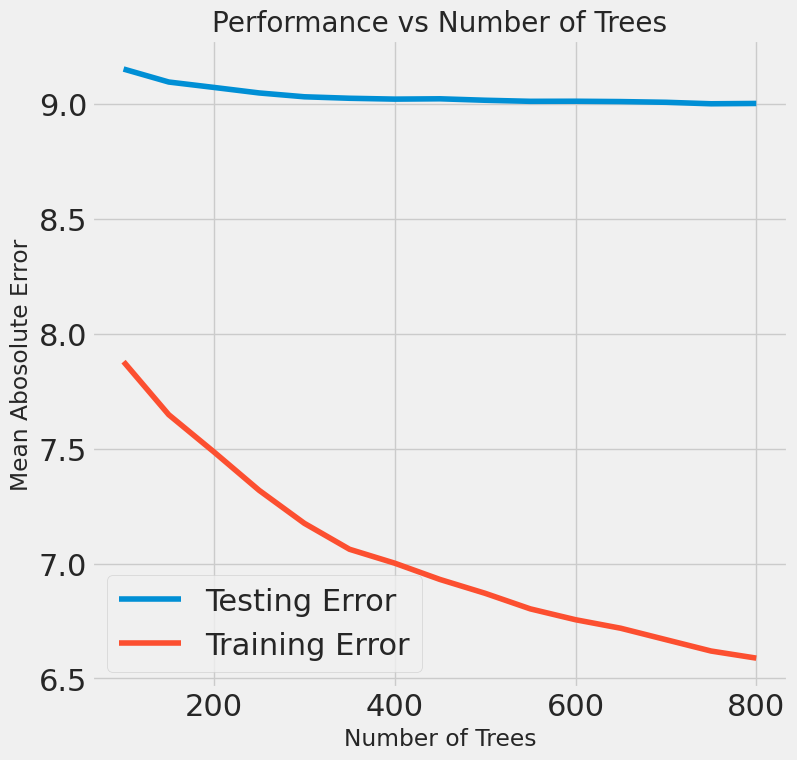

In [87]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [88]:
results.sort_values('mean_test_score', ascending = False).head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
13      33.236861      0.675630         0.022201        0.000406   
14      35.555468      0.379497         0.034897        0.012328   
12      31.228475      0.457408         0.020626        0.000570   
11      28.987010      0.411209         0.029761        0.010642   
9       24.812240      0.118787         0.017520        0.000479   

   param_n_estimators                 params  split0_test_score  \
13                750  {'n_estimators': 750}          -8.901092   
14                800  {'n_estimators': 800}          -8.903857   
12                700  {'n_estimators': 700}          -8.904269   
11                650  {'n_estimators': 650}          -8.906208   
9                 550  {'n_estimators': 550}          -8.918502   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
13          -8.751699          -9.298411          -9.049730        -9.000233   
14          -8.758299          -9.296941          -9.047485        -9.001645   
12          -8.755862          -9.312990          -9.053755        -9.006719   
11          -8.755401          -9.325190          -9.052215        -9.009754   
9           -8.756938          -9.325492          -9.042721        -9.010913   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
13        0.201840                1           -6.716494           -6.660453   
14        0.198797                2           -6.689643           -6.648109   
12        0.205815                3           -6.743886           -6.695770   
11        0.210191                4           -6.778068           -6.721452   
9         0.207975                5           -6.874737           -6.781878   

    split2_train_score  split3_train_score  mean_train_score  std_train_score  
13           -6.520818           -6.579989         -6.619438         0.074807  
14           -6.486269           -6.530287         -6.588577         0.083101  
12           -6.611240           -6.624919         -6.668953         0.053861  
11           -6.708191           -6.666758         -6.718617         0.039814  
9            -6.809121           -6.745712         -6.802862         0.047201

In [89]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(loss='absolute_error', max_depth=5,
                          min_samples_leaf=6, min_samples_split=6,
                          n_estimators=750, random_state=42)

In [90]:
%%timeit -n 1 -r 5
default_model.fit(X, y)

2.38 s ± 137 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [91]:
%%timeit -n 1 -r 5
final_model.fit(X, y)

32.8 s ± 460 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [92]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 10.0119.
Final model performance on the test set:   MAE = 9.0474.


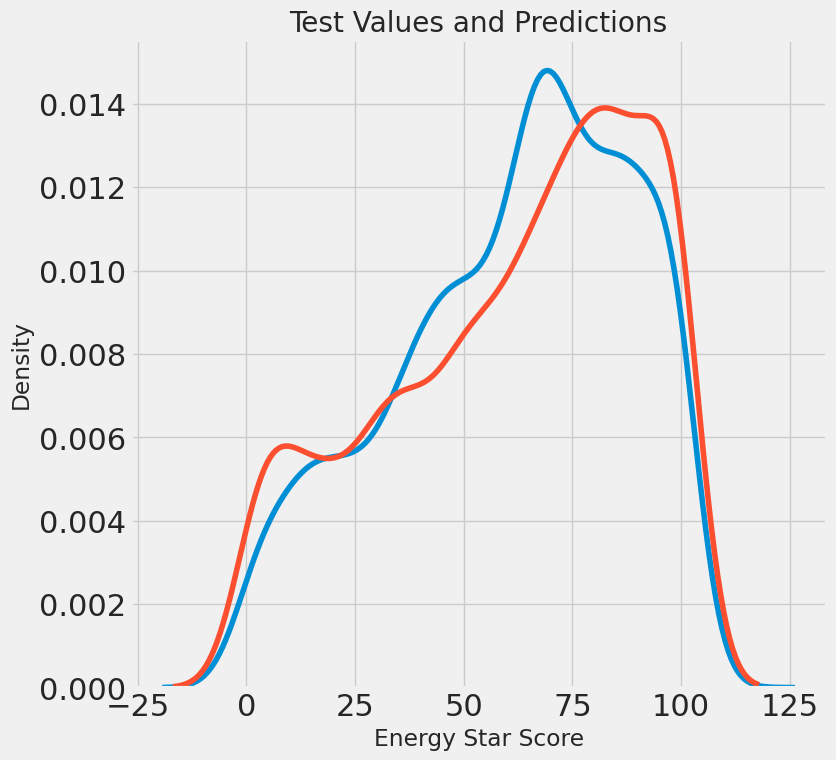

In [93]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

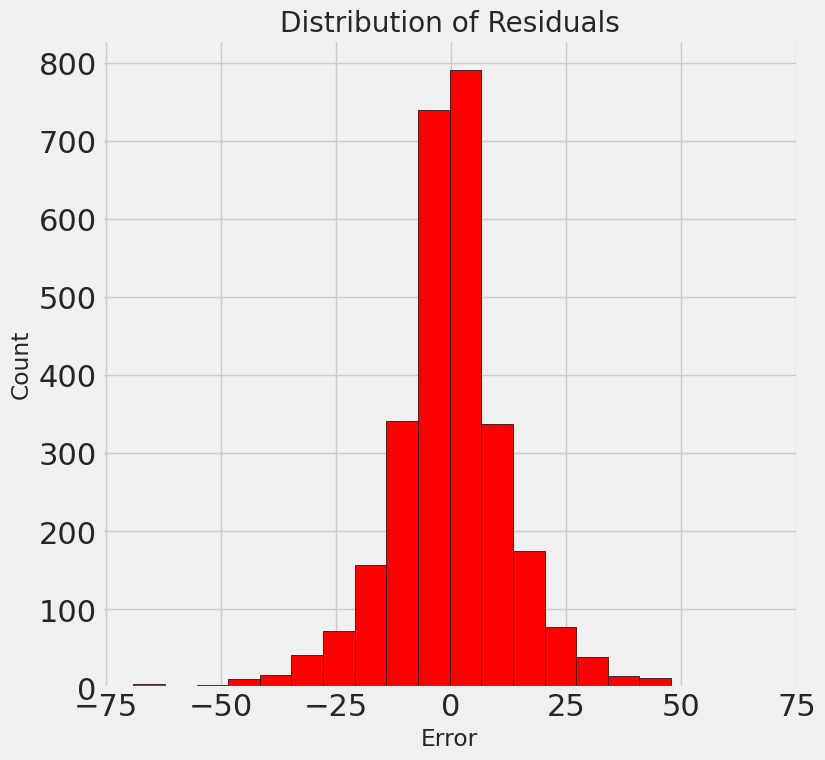

In [94]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

In [2]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=94cf89aecf9613cc58e880663c1ca2ce6f864dd20d732126014de42610a17e48
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [3]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns

sns.set(font_scale = 2)

# Imputing missing values
from sklearn.impute import SimpleImputer

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

from sklearn import tree

# LIME for explaining predictions
import lime 
import lime.lime_tabular

In [6]:
# Read in data into dataframes 
train_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tutorial 01/training_features.csv')
test_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tutorial 01/testing_features.csv')
train_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tutorial 01/training_labels.csv')
test_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Tutorial 01/testing_labels.csv')

In [8]:
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

# Sklearn wants the labels as one-dimensional vectors
y = np.array(train_labels).reshape((-1,))
y_test = np.array(test_labels).reshape((-1,))

In [9]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [11]:
model = GradientBoostingRegressor(loss='absolute_error', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

model.fit(X, y)

GradientBoostingRegressor(loss='absolute_error', max_depth=5,
                          min_samples_leaf=6, min_samples_split=6,
                          n_estimators=800, random_state=42)

In [12]:
#  Make predictions on the test set
model_pred = model.predict(X_test)

print('Final Model Performance on the test set: MAE = %0.4f' % mae(y_test, model_pred))

Final Model Performance on the test set: MAE = 9.0839


In [13]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(train_features.columns), 
                                'importance': model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

feature  importance
0                                Site EUI (kBtu/ft²)    0.452163
1  Weather Normalized Site Electricity Intensity ...    0.249107
2      Water Intensity (All Water Sources) (gal/ft²)    0.056662
3                                        Property Id    0.031396
4  Largest Property Use Type_Non-Refrigerated War...    0.025153
5                               DOF Gross Floor Area    0.025003
6  log_Water Intensity (All Water Sources) (gal/ft²)    0.022335
7      Largest Property Use Type_Multifamily Housing    0.021462
8                                              Order    0.020169
9        log_Direct GHG Emissions (Metric Tons CO2e)    0.019410

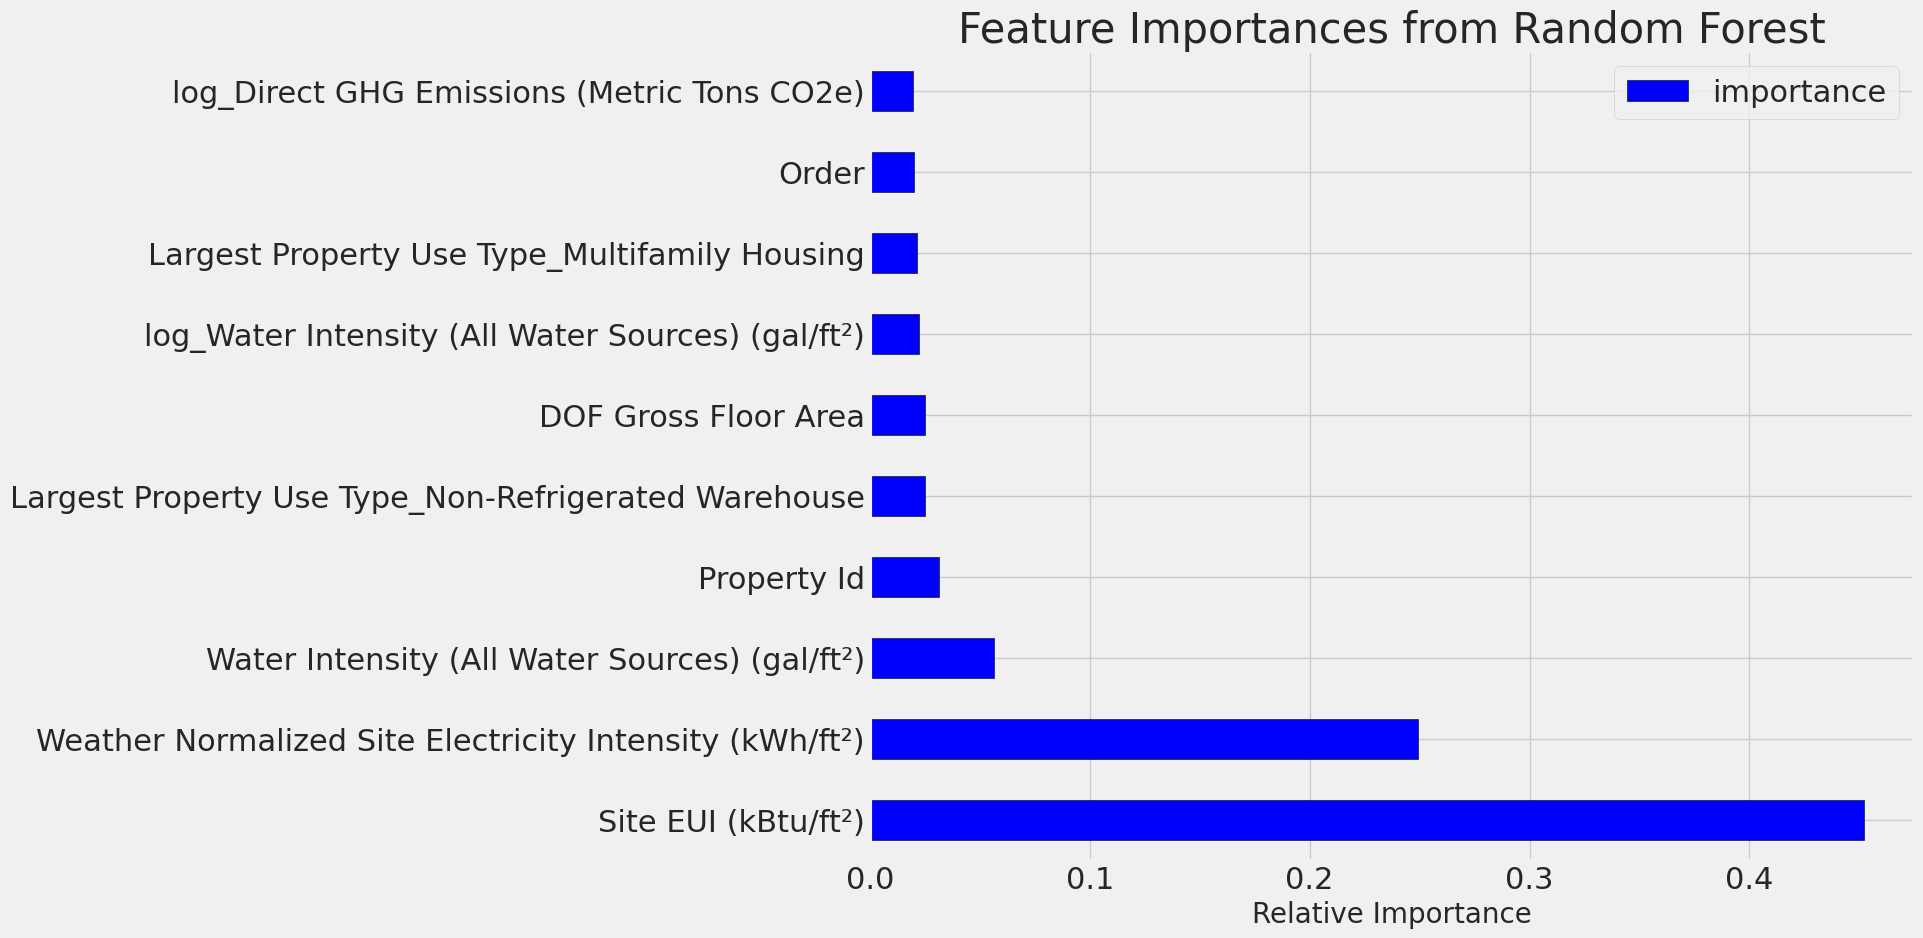

In [14]:
figsize(12, 10)
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);

In [15]:
# Extract the names of the most important features
most_important_features = feature_results['feature'][:10]

# Find the index that corresponds to each feature name
indices = [list(train_features.columns).index(x) for x in most_important_features]

# Keep only the most important features
X_reduced = X[:, indices]
X_test_reduced = X_test[:, indices]

print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (6622, 10)
Most important testing  features shape:  (2839, 10)


In [16]:
lr = LinearRegression()

# Fit on full set of features
lr.fit(X, y)
lr_full_pred = lr.predict(X_test)

# Fit on reduced set of features
lr.fit(X_reduced, y)
lr_reduced_pred = lr.predict(X_test_reduced)

# Display results
print('Linear Regression Full Results: MAE =    %0.4f.' % mae(y_test, lr_full_pred))
print('Linear Regression Reduced Results: MAE = %0.4f.' % mae(y_test, lr_reduced_pred))

Linear Regression Full Results: MAE =    13.4651.
Linear Regression Reduced Results: MAE = 14.5095.


In [18]:
# Create the model with the same hyperparamters
model_reduced = GradientBoostingRegressor(loss='absolute_error', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

# Fit and test on the reduced set of features
model_reduced.fit(X_reduced, y)
model_reduced_pred = model_reduced.predict(X_test_reduced)

print('Gradient Boosted Reduced Results: MAE = %0.4f' % mae(y_test, model_reduced_pred))

Gradient Boosted Reduced Results: MAE = 9.3735


In [19]:
# Find the residuals
residuals = abs(model_reduced_pred - y_test)
    
# Exact the worst and best prediction
wrong = X_test_reduced[np.argmax(residuals), :]
right = X_test_reduced[np.argmin(residuals), :]

In [20]:
# Create a lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_reduced, 
                                                   mode = 'regression',
                                                   training_labels = y,
                                                   feature_names = list(most_important_features))

Prediction: 16.3665
Actual Value: 96.0000


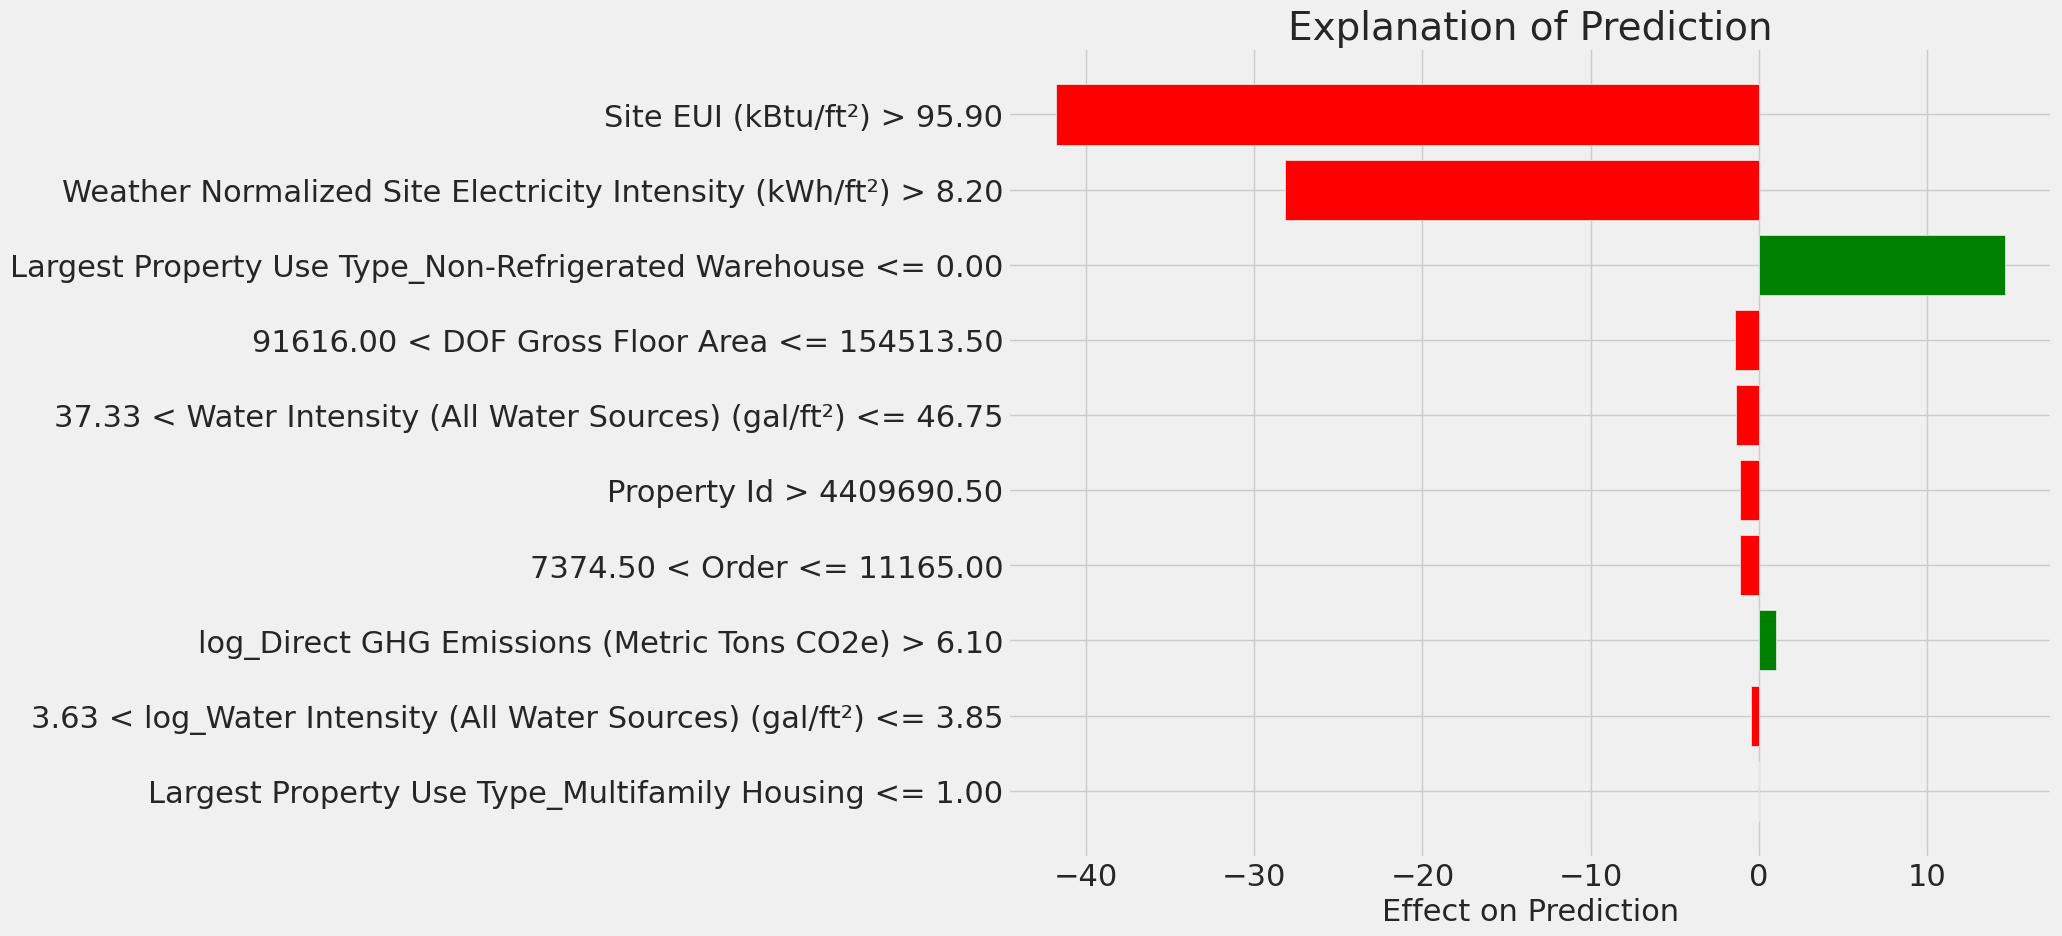

In [21]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

# Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong, 
                                       predict_fn = model_reduced.predict)

# Plot the prediction explaination
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [22]:
wrong_exp.show_in_notebook(show_predicted_value=False)

Prediction: 100.0000
Actual Value: 100.0000


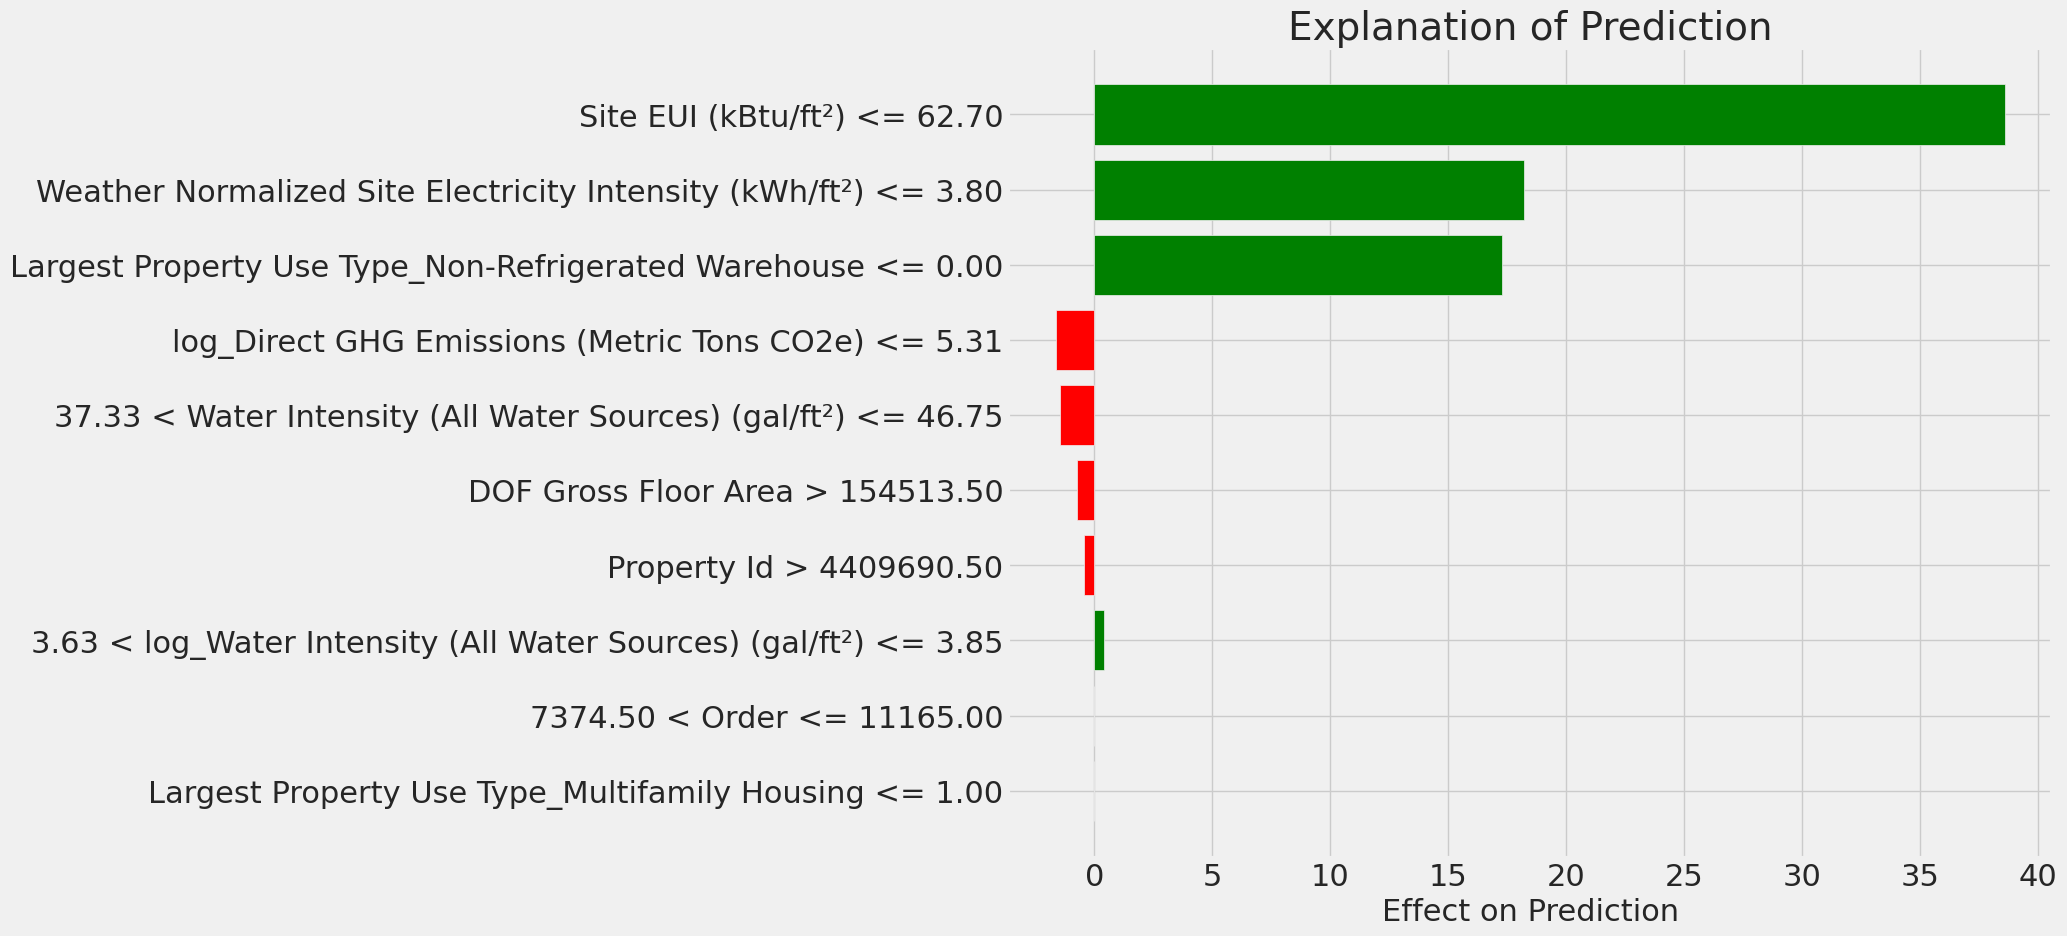

In [23]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# Explanation for wrong prediction
right_exp = explainer.explain_instance(right, model_reduced.predict, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [24]:
right_exp.show_in_notebook(show_predicted_value=False)

In [26]:
# Extract a single tree
single_tree = model_reduced.estimators_[105][0]

tree.export_graphviz(single_tree, out_file = '/content/drive/MyDrive/Colab Notebooks/Tutorial 01/tree.dot',
                     rounded = True, 
                     feature_names = most_important_features,
                     filled = True)

single_tree

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, min_samples_leaf=6,
                      min_samples_split=6,
                      random_state=RandomState(MT19937) at 0x7F219B3E0D40)

In [27]:
# Convert to a png from the command line
# This requires the graphviz visualization library (https://www.graphviz.org/)


!dot -Tpng /content/drive/MyDrive/Colab Notebooks/Tutorial 01/tree.dot -o /content/drive/MyDrive/Colab Notebooks/Tutorial 01/tree.png

Error: dot: can't open /content/drive/MyDrive/Colab
Error: dot: can't open Notebooks/Tutorial
Error: dot: can't open 01/tree.dot
Error: dot: can't open Notebooks/Tutorial
Error: dot: can't open 01/tree.png


In [29]:
tree.export_graphviz(single_tree, out_file = '/content/drive/MyDrive/Colab Notebooks/Tutorial 01/tree_small.dot',
                     rounded = True, feature_names = most_important_features,
                     filled = True, max_depth = 3)